###Goal: Review 'basic' concepts from MIR, review Python, and learn about existing MIR tools.

Instructions: Complete sections below, filling in code or responses where marked

First, we load in our audio files

In [ ]:
# download the files
!wget https://github.com/dl4genaudio/assignments/raw/main/audio/drums.aif
!wget https://github.com/dl4genaudio/assignments/raw/main/audio/violin.wav
!ls

# store their names in variables
drums = 'drums.aif'
violin = 'violin.wav'

--2022-02-08 01:16:17--  https://github.com/dl4genaudio/assignments/raw/main/audio/drums.aif
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dl4genaudio/assignments/main/audio/drums.aif [following]
--2022-02-08 01:16:17--  https://raw.githubusercontent.com/dl4genaudio/assignments/main/audio/drums.aif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530792 (518K) [audio/aiff]
Saving to: ‘drums.aif’

drums.aif           100%[===================>] 518.35K  --.-KB/s    in 0.04s   

2022-02-08 01:16:17 (12.1 MB/s) - ‘drums.aif’ saved [530792/530792]

--2022-02-08 01:16:17--  https://github.com/dl4gena

## Part 1: Reading Audio

Librosa is a Python package for music and audio processing.

1. First, import librosa. Then, use librosa.load to load the 'drums' audio file into an audio array. You'll need a variable to store the audio array and a variable to store the sampling rate (fs or sr are common choices). 
2. Display the length of the signal and the sampling rate.



In [ ]:
import librosa
x, fs = librosa.load(drums, sr=None) # fs is a common choice to abreviate sampling rate

print('Signal Shape:', # your code here
print('Sampling Rate:', # your code here

# Q: What is a sampling rate??
# A:

## Part 2: Playing Audio

IPython is another Python package we will use here. 
1. import IPython.display as ipd
2. Use IPython to load and play the 'drums' audio file.

In [ ]:
import IPython.display as ipd
ipd.Audio(x, rate=fs) 


## Part 2b: Read and Play the violin audio file

In [ ]:
y, fs = librosa.load(violin, sr=None)

print('Signal Shape:', # your code here
print('Sampling Rate:', # your code here
      
ipd.Audio(y, rate=fs) 

## Part 3: Visualizing Audio

1. Matplotlib is another Python library used for plotting. Import matplotlib.pyplot as plt.
2. Create a new figure using plt.figure
3. Use librosa.display.waveplot to display our drum signal and our violin signal. Do they look different?
4. Try to plot only some of the violin audio file, so it matches the length of the drum audio file. 
5. Add titles

Notice, this visualization is in the time domaine (i.e. time is on the x axis). Where have you seen audio represented like this?

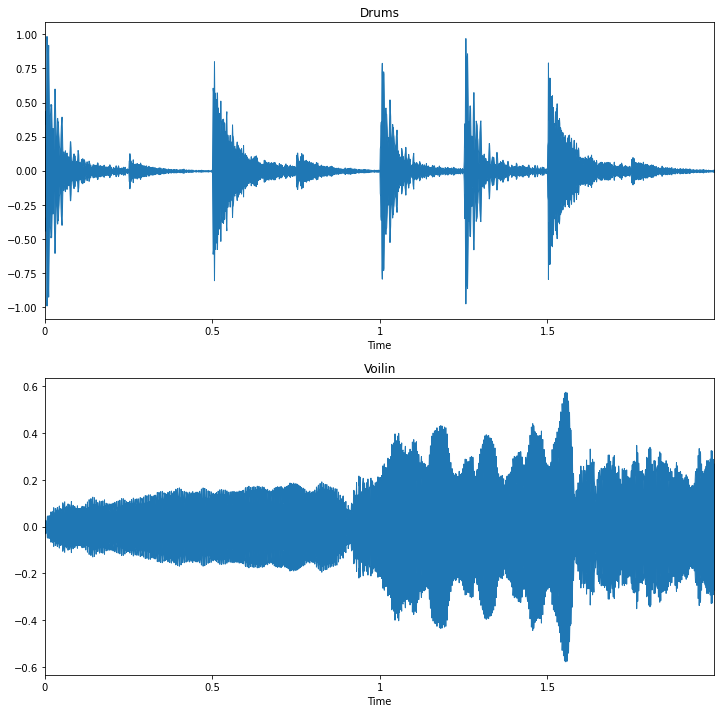

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.title('Drums')
librosa.display.waveplot(x, fs, x_axis = 'time')
plt.subplot(2, 1, 2)
plt.title('Voilin')
# plot the beginning of the violin file so that it matches the length of the drums file.
# you will have to index the array holding the violin signal
librosa.display.waveplot(y #your code here



## Part 4: Audio Features

Now we've plotted our signal, cool! How much information can we get from those plots?

Sometimes a bit of information. Sometimes... not much. We use some **audio features** to help us learn more about our audio file. 

We'll look at Spectral Centroid, RMS, and Zero-Crossing Rate.  


#### Spectral Centroid
**Spectral centroid**: indicates at which frequency the energy of a spectrum is centered upon


#### RMS Energy
The **energy** of a signal is the total magntiude of the signal. For audio, that roughly corresponds to how loud the signal is. The **RMS Energy ** is the root mean square of the energy.

\begin{equation}
\sqrt{ \frac{1}{N} \sum_n \left| x(n) \right|^2 }
\end{equation}

#### Zero Crossing Rate
**Zero Crossing Rate**: The number of time a signal crosses the horizontal axis

Notice a higher zero-crossing rate when there's a snare drum. Also notice the higher ZCR at the beginning of the file.

1. Two functions are proivided below. What does extract_features do? What does plot_features do?
2. Use these to learn more about the drums audio file. 

In [ ]:
def extract_feature(x, feature, win_length, fs):
    hop_length = int(win_length/2)
    spec_cent = librosa.feature.spectral_centroid(x, # your code here to complete this function call 
    rms = librosa.feature.rms(x, # your code here to complete this function call 
    zcr = librosa.feature.zero_crossing_rate(x, # your code here to complete this function call 
    if feature == "spec_cent": 
        return spec_cent
    if feature == "rms":
        return rms
    if feature == "zcr":
        return zcr

In [ ]:
# you do not have to anything here

def plot_features(x, fs, win_length):
    spec_cent = extract_feature(x, "spec_cent", win_length, fs) # Calls the function defined in the previous cell
    rms = extract_feature(x, "rms", win_length, fs) # Calls the function defined in the previous cell
    zcr = extract_feature(x, "zcr", win_length, fs) # Calls the function defined in the previous cell

    # change from samples to time
    hop_length = int(win_length/2)
    frames = range(len(x))
    t = librosa.frames_to_time(frames, hop_length)
    plt.figure(figsize=(15, 17))
    ax = plt.subplot(4, 1, 1)
    librosa.display.waveplot(x, fs);
    plt.title("Audio File")

    frames = range(len(spec_cent))
    t = librosa.frames_to_time(frames, hop_length)
    plt.subplot(4, 1, 2)
    plt.plot(spec_cent)
    plt.title("Spec_cent")

    frames = range(len(rms))
    t = librosa.frames_to_time(frames, hop_length)
    plt.subplot(4, 1, 3)
    plt.plot(t, rms)
    plt.title("RMS")
    
    frames = range(len(zcr))
    t = librosa.frames_to_time(frames, hop_length)
    plt.subplot(4, 1, 4)
    plt.plot(t, zcr)
    plt.title("ZCR")
    plt.show()

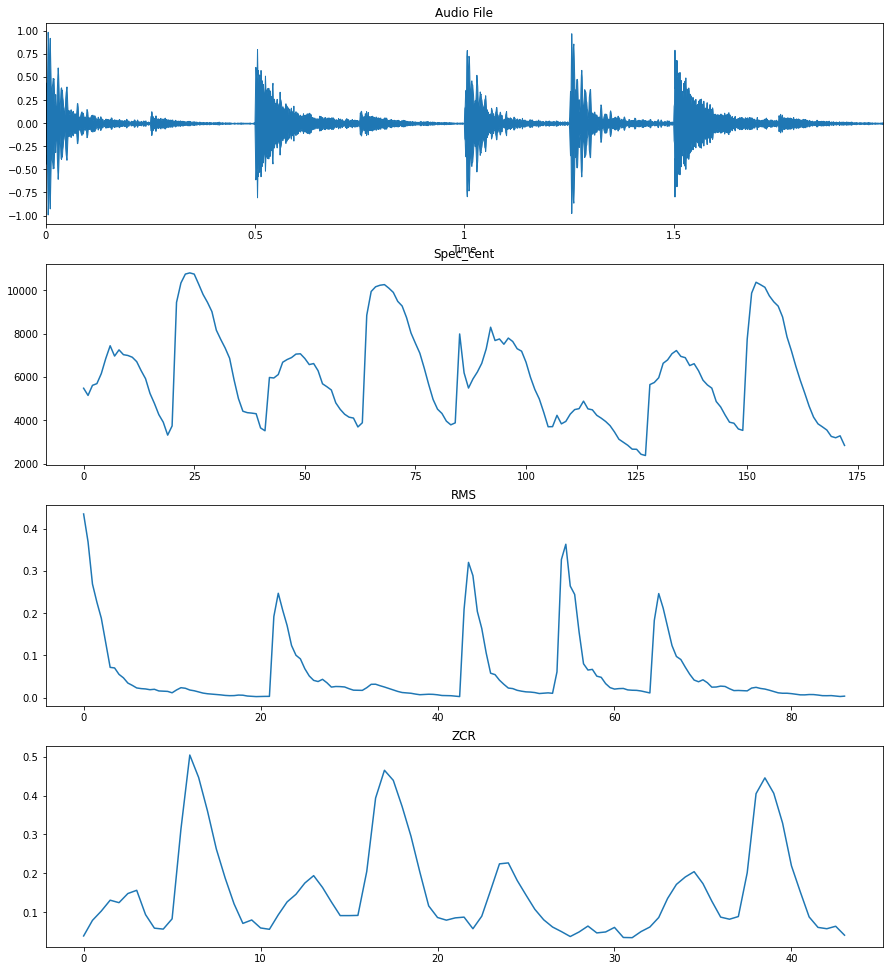

In [ ]:
plot_features(x, fs, 2048)

## Part 5: Fourier Transform

The Fourier Transform is one of the most fundamental operations in applied mathematics and signal processing.

It transforms our **time-domain signal** into the **frequency domain**. The time domain we have above expresses our signal as a sequence of samples, and the frequency domain expresses our signal as a superposition of sinusoids of varying magnitudes, frequencies, and phase offsets.
[
You can read more about the Fourier Transform on Wikipedia.](https://https://en.wikipedia.org/wiki/Fourier_transform)

1. import numpy as np and import scipy
2. Compute a Fourier Transform
3. Plot the spectrum and play around with the plot such that the peaks are clear.

Notice, we are now in the frequency domaine (i.e. frequency is on the x axis). What do you see?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


Text(0.5, 0, 'Frequency (Hz)')

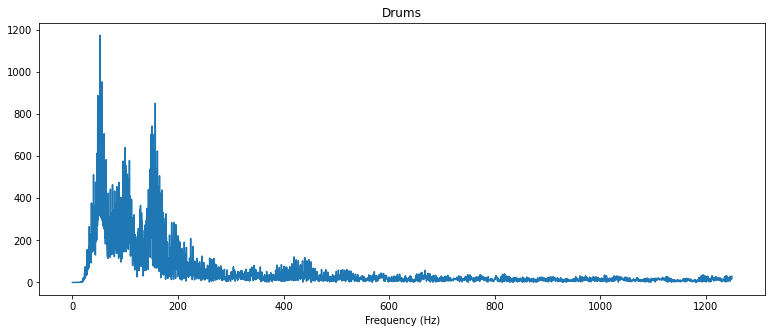

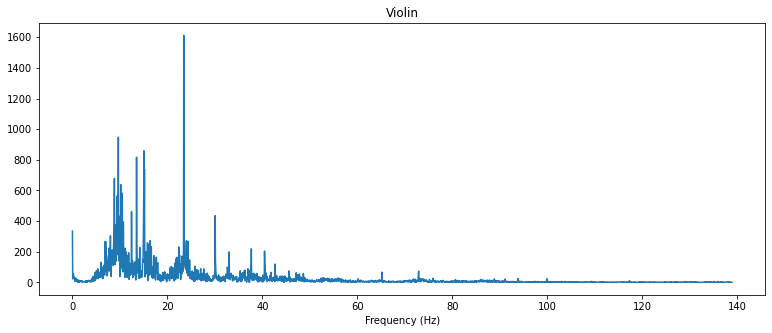

In [ ]:
import numpy as np
import scipy

X = # your code here
X_mag = # your code here
f = # your code here        # the vector with frequency bins in Hertz

Y = # your code here
Y_mag = # your code here
f_y = # your code here      # the vector with frequency bins in Hertz

# Plotting
plt.figure(figsize=(13, 5))
#plt.plot(f, X_mag) # magnitude spectrum, up to ~50kHz
plt.plot(f[:2500], X_mag[:2500]) #"Zoom in"
plt.title("Drums")
plt.xlabel('Frequency (Hz)')

plt.figure(figsize=(13, 5))
#plt.plot(f, X_mag) # magnitude spectrum, up to ~50kHz
plt.plot(f_y[:2500], Y_mag[:2500]) #"Zoom in"
plt.title("Violin")
plt.xlabel('Frequency (Hz)')

## Part 6: STFT

Music signals change over time. It's rather meaningless to compute a single Fourier Transform over a whole song. 

Short-time Fourier transform (STFT) is obtained by computing the Fourier transform like above but for successive frames in a signal. [You can read more about the STFT on Wikipedia](https://https://en.wikipedia.org/wiki/Short-time_Fourier_transform). 


1. Use librosa.stft to compute an STFT. Please use a hop length of 512 and a frame size of 2048 (these are somewhat standard selections). 
2. Print the shape of the STFT. 

In [ ]:
hop_length = 512
n_fft = 2048
X = librosa.stft( # your code here
print("Drum signal shape:", # your code here   # frequency bins, frames in time

Y = librosa.stft(y, # your code here
print("Violin signal shape:", # your code here   # frequency bins, frames in time


Drum signal shape: (1025, 173)
Drum signal shape: (1025, 1550)


##Part 7: Spectrograms 

The STFT we did above is the first step towards making a spectrogram!
What is a spectrogram? Let's try one out! 
[Harvard The Music Lab Spectrogram](https://musiclab.chromeexperiments.com/spectrogram/)

A spectrogram shows the intensities of frequencies over time. It is simply the squared magnitude of the stft.

1. Use librosa.amplitude_to_db to take the log amplitude of our STFT above. We do this because human perception of sound intensity is logarithmic.
2. Use librosa.display.specshow to print out our spectrogram. 
3. You can also use the following line to add a legend for the plot: plt.colorbar(format='%+2.0f dB')

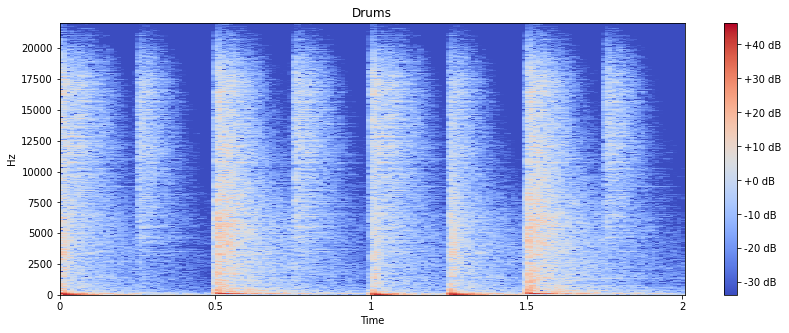

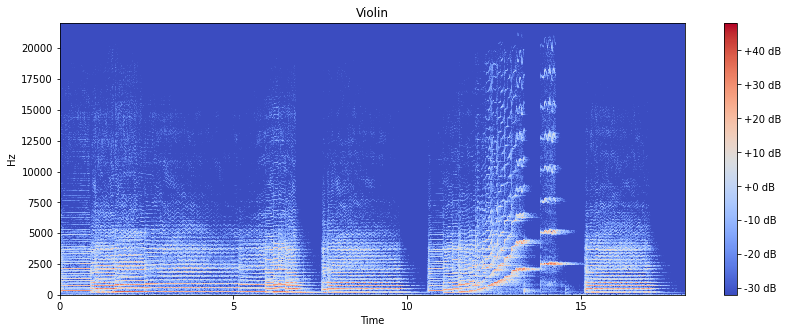

In [ ]:
XdB = librosa.amplitude_to_db(abs(X))
YdB = librosa.amplitude_to_db(abs(Y))

plt.figure(figsize=(14, 5))
plt.title('Drums')
librosa.display.specshow(XdB, sr=fs, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

plt.figure(figsize=(14, 5))
plt.title('Violin')
librosa.display.specshow(YdB, sr=fs, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')



## Part 7b: Mel Spectrogram

Next, let's do a Mel spectrogram. Human perception of sound intensity is logarithmic. Therefore, like the STFT, we are interested in the log amplitude.

1. Use librosa.feature.melspectrogram to create a mel spectroram.
2. use librosa.power_to_db 
3. Display the new spectrogram using librosa.display.specshow. Include a title and the colorbar as above.

What do you see? How does it compare to The Music Lab's spectrogram demo?

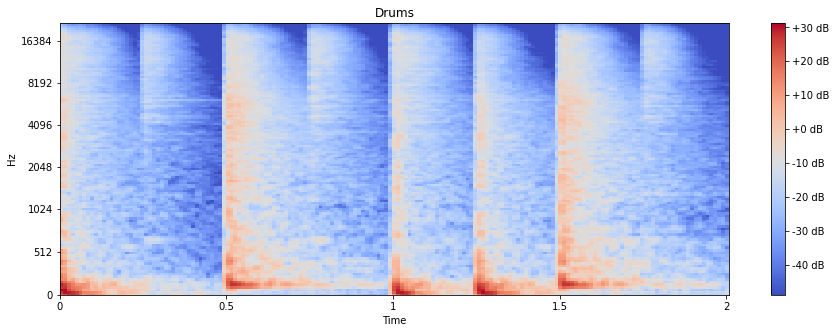

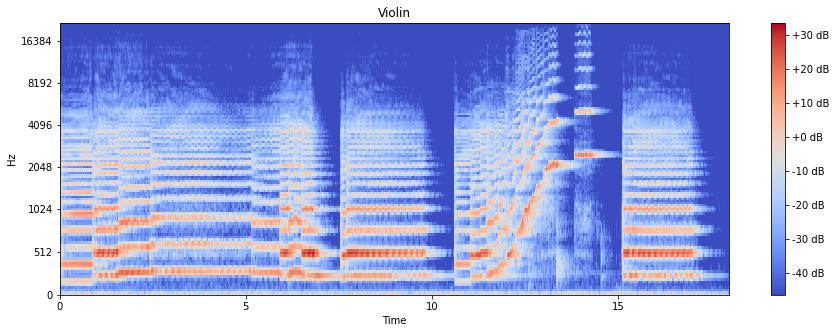

In [ ]:
S_x = librosa.feature.melspectrogram(x, # your code here
logS_x = librosa.power_to_db(abs(S_x))

S_y = librosa.feature.melspectrogram(y, # your code here
logS_y = librosa.power_to_db(abs(S_y))

plt.figure(figsize=(15, 5))
plt.title('Drums')
librosa.display.specshow(logS_x, sr=fs, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

plt.figure(figsize=(15, 5))
plt.title('Violin')
librosa.display.specshow(logS_y, sr=fs, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')